<a href="https://colab.research.google.com/github/subhamyadav580/COVID-19-INDIA-Latest-Updates/blob/master/Fish_Weight_Estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from fastai.imports import *
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import seaborn as sns
from google.colab import files
import io


In [8]:
uploaded = files.upload()

Saving datasets_229906_491820_Fish.csv to datasets_229906_491820_Fish.csv


In [11]:
data = pd.read_csv(io.BytesIO(uploaded['datasets_229906_491820_Fish.csv']))
df = data.copy()
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [12]:
# Checking missing values

print(str('Is there any NaN value in the dataset : '), df.isnull().values.any())

Is there any NaN value in the dataset :  False


In [13]:
# Different Species and there counts 
sp = df['Species'].value_counts()
sp = pd.DataFrame(sp)
sp

,Species
Perch,56
Bream,35
Roach,20
Pike,17
Smelt,14
Parkki,11
Whitefish,6


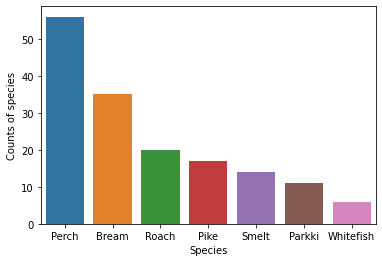

In [14]:
sns.barplot(x=sp.index, y=sp['Species'])
plt.xlabel('Species')
plt.ylabel('Counts of species')
plt.show()

In [15]:
df.corr()

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


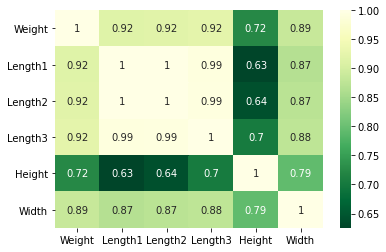

In [20]:
sns.heatmap(df.corr(), annot=True, cmap='YlGn_r')
plt.show()

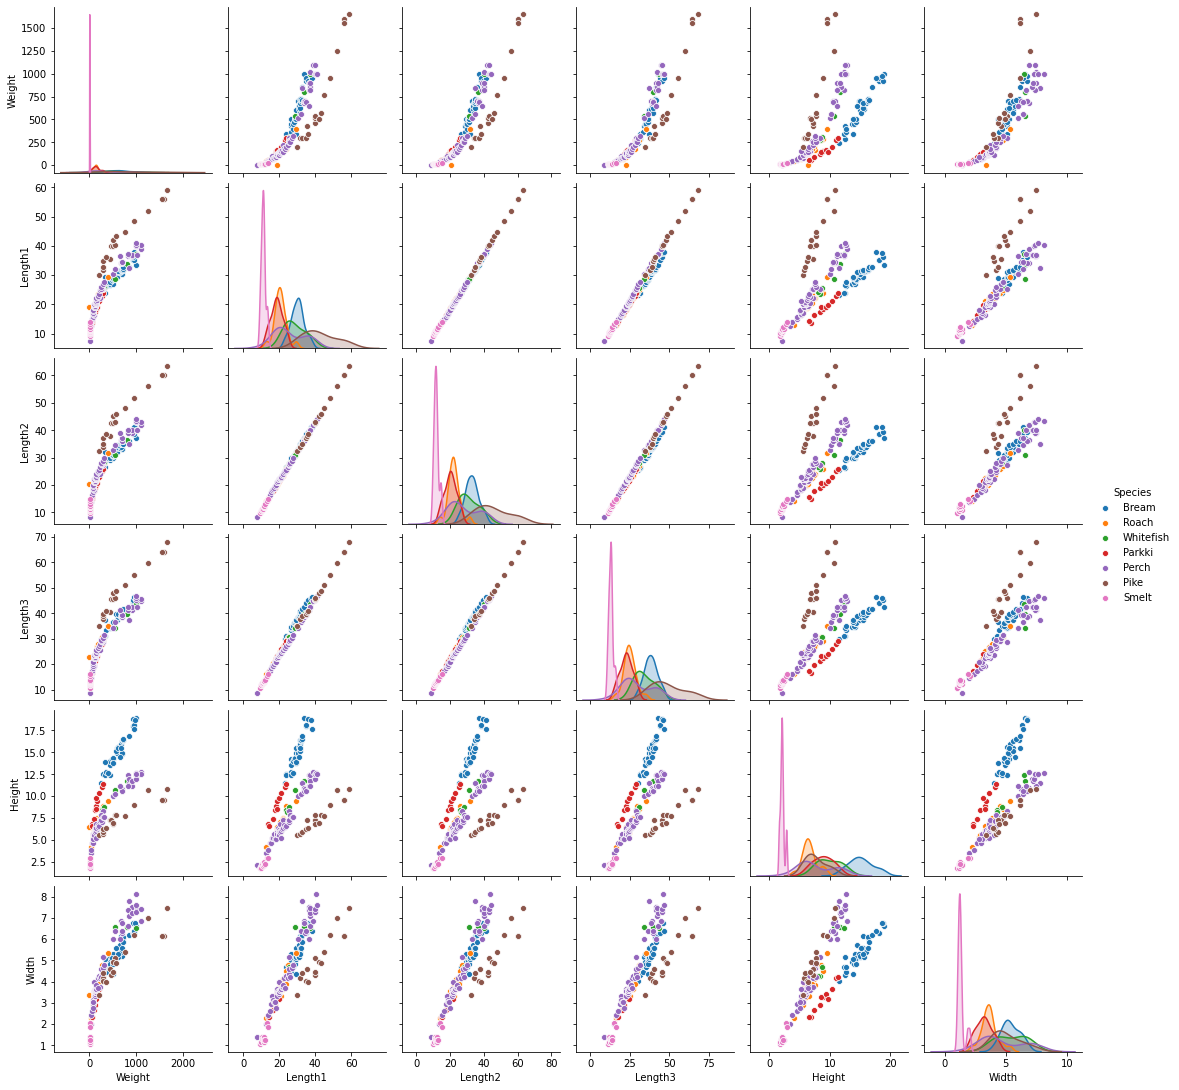

In [21]:
sns.pairplot(df, kind='scatter', hue='Species')
plt.show()

In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight,159.0,398.326415,357.978317,0.0000,120.00000,273.0000,650.0000,1650.000
Length1,159.0,26.247170,9.996441,7.5000,19.05000,25.2000,32.7000,59.000
Length2,159.0,28.415723,10.716328,8.4000,21.00000,27.3000,35.5000,63.400
Length3,159.0,31.227044,11.610246,8.8000,23.15000,29.4000,39.6500,68.000
Height,159.0,8.970994,4.286208,1.7284,5.94480,7.7860,12.3659,18.957
Width,159.0,4.417486,1.685804,1.0476,3.38565,4.2485,5.5845,8.142


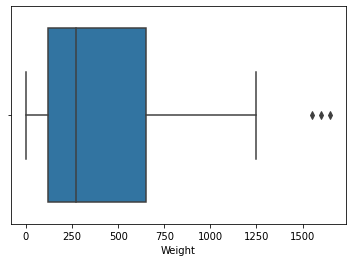

In [24]:
# Analysing the outliers
sns.boxplot(x=df['Weight'])
plt.show()

In [25]:
weight_dfw = df['Weight']
weight_dfw_Q1 = weight_dfw.quantile(0.25)
weight_dfw_Q3 = weight_dfw.quantile(0.75)
weight_dfw_IQR = weight_dfw_Q3 - weight_dfw_Q1

weight_dfw_lowerend = weight_dfw_Q1 - (1.5 * weight_dfw_IQR)
weight_dfw_upperend = weight_dfw_Q3 + (1.5 * weight_dfw_IQR)

weight_dfw_outliers = weight_dfw[(weight_dfw < weight_dfw_lowerend) | (weight_dfw > weight_dfw_upperend)]

weight_dfw_outliers

142    1600.0
143    1550.0
144    1650.0
Name: Weight, dtype: float64

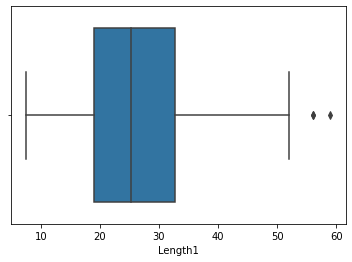

In [28]:
sns.boxplot(x=df['Length1'])
plt.show()

In [26]:
length1_dfw = df['Length1']

length1_dfw_Q1 = length1_dfw.quantile(0.25)
length1_dfw_Q3 = length1_dfw.quantile(0.75)
length1_dfw_IQR = length1_dfw_Q3 - length1_dfw_Q1

length1_dfw_lowerend = length1_dfw_Q1 - (1.5 * length1_dfw_IQR)
length1_dfw_upperend = length1_dfw_Q3 + (1.5 * length1_dfw_IQR)

length1_dfw_outliers = length1_dfw[(length1_dfw < length1_dfw_lowerend) | (length1_dfw > length1_dfw_upperend)]
length1_dfw_outliers

142    56.0
143    56.0
144    59.0
Name: Length1, dtype: float64

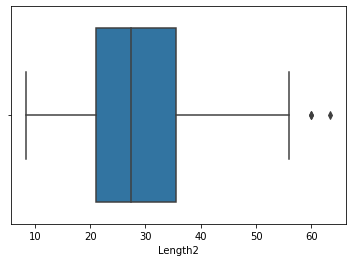

In [30]:
sns.boxplot(x=df['Length2'])
plt.show()

In [32]:
length2_dfw = df['Length2']

length2_dfw_Q1 = length2_dfw.quantile(0.25)
length2_dfw_Q3 = length2_dfw.quantile(0.75)
length2_dfw_IQR = length2_dfw_Q3 - length2_dfw_Q1

length2_dfw_lowerend = length2_dfw_Q1 - (1.5 * length2_dfw_IQR)
length2_dfw_upperend = length2_dfw_Q3 + (1.5 * length2_dfw_IQR)

length2_dfw_outliers = length2_dfw[(length2_dfw < length2_dfw_lowerend) | (length2_dfw > length2_dfw_upperend)]
length2_dfw_outliers

142    60.0
143    60.0
144    63.4
Name: Length2, dtype: float64

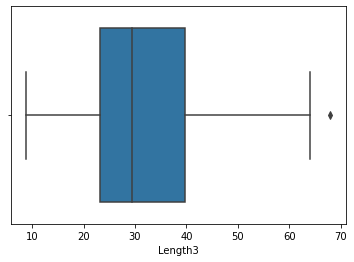

In [33]:
sns.boxplot(x=df['Length3'])
plt.show()

In [34]:
length3_dfw = df['Length3']

length3_dfw_Q1 = length3_dfw.quantile(0.25)
length3_dfw_Q3 = length3_dfw.quantile(0.75)
length3_dfw_IQR = length3_dfw_Q3 - length3_dfw_Q1

length3_dfw_lowerend = length3_dfw_Q1 - (1.5 * length3_dfw_IQR)
length3_dfw_upperend = length3_dfw_Q3 + (1.5 * length3_dfw_IQR)

length3_dfw_outliers = length3_dfw[(length3_dfw < length3_dfw_lowerend) | (length3_dfw > length3_dfw_upperend)]
length3_dfw_outliers

144    68.0
Name: Length3, dtype: float64

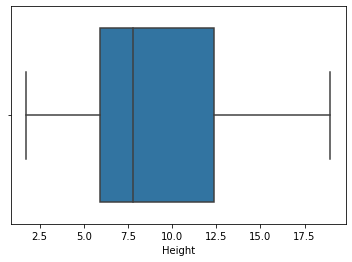

In [35]:
sns.boxplot(x=df['Height'])
plt.show()

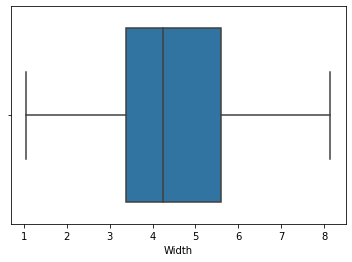

In [36]:
sns.boxplot(x=df['Width'])
plt.show()

In [38]:
df1 = df.drop([142, 143, 144])
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight,156.0,375.217308,319.546978,0.0000,120.000000,271.0000,612.500000,1250.000
Length1,156.0,25.655769,9.119630,7.5000,19.000000,25.0000,32.125000,52.000
Length2,156.0,27.786538,9.792651,8.4000,21.000000,26.7500,35.000000,56.000
Length3,156.0,30.571154,10.695359,8.8000,23.025000,29.2500,39.425000,59.700
Height,156.0,8.951128,4.324325,1.7284,5.931675,7.6478,12.378550,18.957
Width,156.0,4.375719,1.672188,1.0476,3.369600,4.2433,5.424375,8.142


In [39]:
# Dependent variable  (Target)
y = df1['Weight']
X = df1.iloc[ : , 2:7]

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [41]:
print('How many samples do we have in our test and train datasets?')
print('X_train: ', np.shape(X_train))
print('y_train: ', np.shape(y_train))
print('X_test: ', np.shape(X_test))
print('y_test: ', np.shape(y_test))

How many samples do we have in our test and train datasets?
X_train:  (124, 5)
y_train:  (124,)
X_test:  (32, 5)
y_test:  (32,)


In [42]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
y_head = reg.predict(X_train)
y_head

array([ 202.90452767,  885.91891353,  942.33274059,  702.05036955,
        942.59702197,  427.99145379, -150.88081432,  916.52520124,
        586.70156842,  705.94716872,  873.17227904,  791.38911847,
        501.30131283,  579.17897951,  -78.20743812,  356.3589173 ,
        556.19355965,   81.46095539,  623.16973397,  214.39165686,
        441.71254524,  182.34732588,  443.17900718,  167.54787901,
         32.77781374,  810.85922684, -158.0397093 ,  666.53918739,
        500.74918444,  535.98775854,  168.60962373,  937.48919052,
        239.22983111,  836.53179174,  369.64822026,  442.89429899,
        493.22024413,  314.50718501,  762.94546735,  213.4966049 ,
        289.6453122 ,   90.3951257 ,  147.92945773,  192.51371361,
         43.48615293,  -16.50017721,  808.73836151,  219.98974829,
        360.18212833,  180.27793414,  522.99905689,  861.01794789,
        853.61524195,  362.32655458,   94.02219808,  133.51160735,
        712.50103494,  -87.06663973,  667.31969018,  635.11235

In [46]:
reg.score(X_train, y_train)

0.9116039087262158

In [45]:
r2_score(y_train, y_head)

0.9116039087262157

In [47]:
y_pred = reg.predict(X_test)


In [49]:
pred_df = pd.DataFrame(y_pred, columns=['Estimated Weight'])
pred_df = pred_df.reset_index(drop=True)
pred_df

,Estimated Weight
0,746.034615
1,44.698577
2,282.287266
3,777.208209
4,-74.802289
5,159.717948
6,569.637735
7,651.097615
8,349.707917
9,-163.684074


In [50]:
y_test1 = pd.DataFrame(y_test)
y_test1 = y_test1.reset_index(drop=True)
y_test1

,Weight
0,650.0
1,51.5
2,180.0
3,955.0
4,40.0
5,0.0
6,600.0
7,514.0
8,272.0
9,9.8


In [52]:
ynew = pd.concat([y_test1, pred_df], axis=1)
ynew

,Weight,Estimated Weight
0,650.0,746.034615
1,51.5,44.698577
2,180.0,282.287266
3,955.0,777.208209
4,40.0,-74.802289
5,0.0,159.717948
6,600.0,569.637735
7,514.0,651.097615
8,272.0,349.707917
9,9.8,-163.684074
